## Testing augmentation on example image

Augmentation in Pytorch: https://rumn.medium.com/ultimate-guide-to-fine-tuning-in-pytorch-part-3-deep-dive-to-pytorch-data-transforms-53ed29d18dde

In [1]:
# Download image fragments

!wget https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip

--2024-08-09 15:12:30--  https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip
Resolving sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)... 16.12.10.2, 3.5.217.57
Connecting to sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)|16.12.10.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1779842156 (1.7G) [binary/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.66G  30.0MB/s    in 59s     

2024-08-09 15:13:30 (28.6 MB/s) - ‘data.zip’ saved [1779842156/1779842156]



In [2]:
# unzip

!mkdir -p fragments
!unzip -q data.zip -d fragments

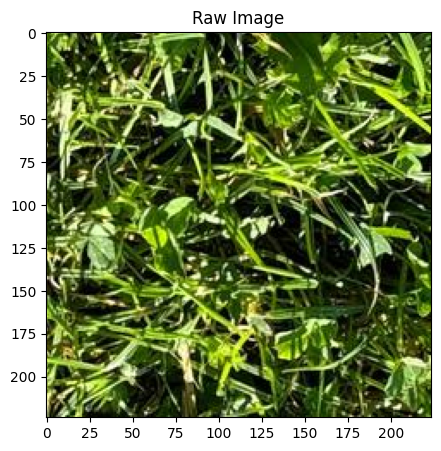

In [3]:
# Display unprocessed image

import matplotlib.pyplot as plt
from PIL import Image

image_path = "fragments/More Clover_7_582_1358.jpg"
raw_image = Image.open(image_path).convert('RGB')

plt.figure(figsize=(5, 5))
plt.imshow(raw_image)
plt.title('Raw Image')
plt.show()

In [4]:
# define plotting function

import matplotlib.pyplot as plt
import numpy as np

def plot_transformed_image(transformed_img_tensor, title):
    """
    Parameters:
    transformed_img_tensor (torch.Tensor): The transformed image tensor.

    Returns:
    ax (matplotlib.axes._subplots.AxesSubplot): The matplotlib ax object of the plot.
    """

    # Convert the tensor to a NumPy array
    img_np = np.transpose(transformed_img_tensor.numpy(), (1, 2, 0))

    fig, ax = plt.subplots()

    ax.imshow(img_np)
    ax.set_title(title)

    return plt.show()

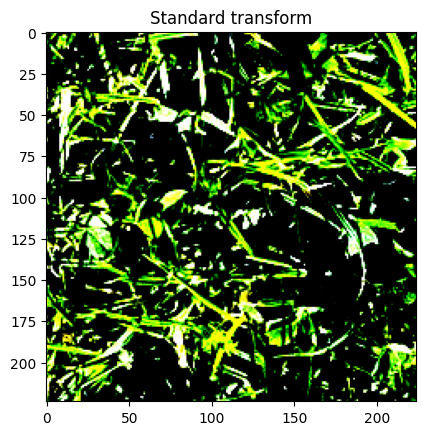

In [5]:
# define standard transform

import numpy as np
import torch
from torchvision.transforms import v2

std_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

std_transform_img_tensor = std_transform(raw_image)

plot_transformed_image(std_transform_img_tensor, title='Standard transform')

Lets try some different transforms

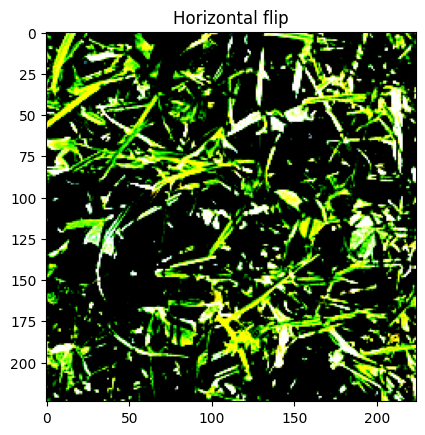

In [6]:
# horizontal flip
hz_flip_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.RandomHorizontalFlip(p=1), # NB this will always flip image, use p=0.5 for training
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

hz_transform_img_tensor = hz_flip_transform(raw_image)

plot_transformed_image(hz_transform_img_tensor, title='Horizontal flip')

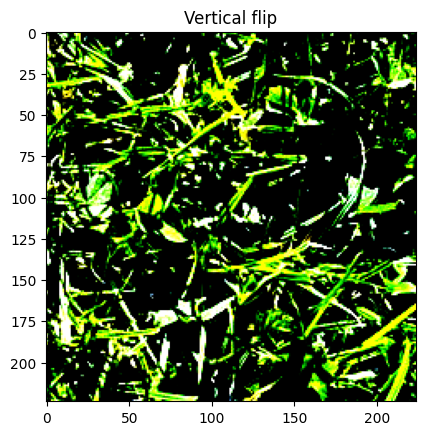

In [7]:
# vertical flip
vt_flip_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.RandomVerticalFlip(p=1), # NB this will always flip image, use p=0.5 for training
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

vt_transform_img_tensor = vt_flip_transform(raw_image)

plot_transformed_image(vt_transform_img_tensor, title='Vertical flip')

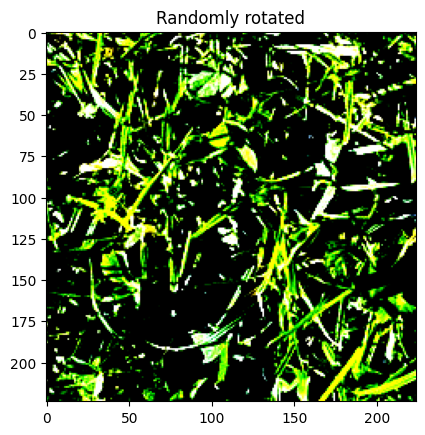

In [8]:
# Random rotation (can be either 90, 180, or 270 degrees)

from torchvision.transforms.functional import rotate

rand_rot_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.RandomChoice([
        lambda x: rotate(x, angle=90),
        lambda x: rotate(x, angle=180),
        lambda x: rotate(x, angle=270),
    ]),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

rot_transform_img_tensor = rand_rot_transform(raw_image)

plot_transformed_image(rot_transform_img_tensor, title='Randomly rotated')

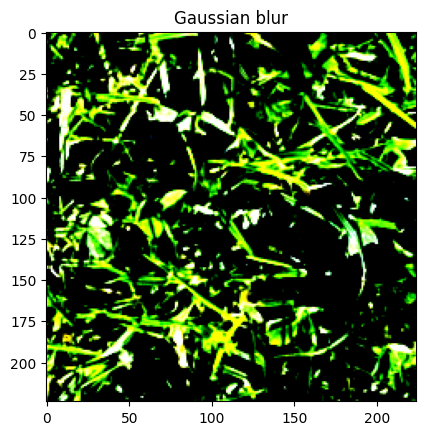

In [18]:
# Gaussian blur
blur_transform = v2.Compose([
    v2.Resize((224, 224)),
    # v2.GaussianBlur(kernel_size=(5, 5), sigma=(0.9, 1.0)),
    v2.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 1.0)), # Use this range for training
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

blur_transform_img_tensor = blur_transform(raw_image)

plot_transformed_image(blur_transform_img_tensor, title='Gaussian blur')

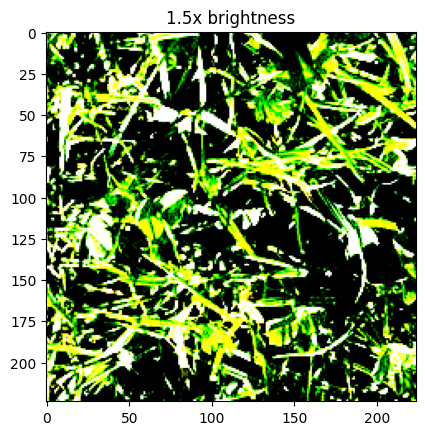

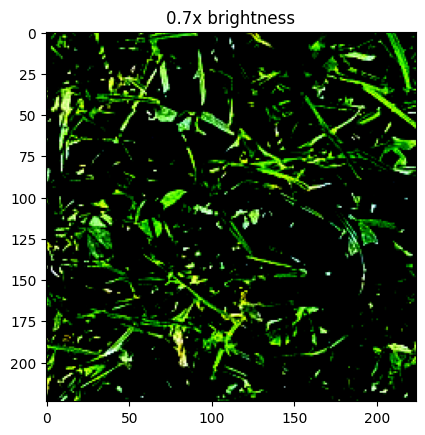

In [10]:
# Brightness

# use this in actual model
# bright_transform = v2.Compose([
#     v2.Resize((224, 224)),
#     v2.ColorJitter(brightness=(0.7, 1.5)),
#     v2.ToImage(),
#     v2.ToDtype(torch.float32, scale=True),
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])


max_bright_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ColorJitter(brightness=(1.4, 1.5)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

low_bright_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ColorJitter(brightness=(0.7, 0.75)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

max_bri_transform_img_tensor = max_bright_transform(raw_image)
low_bri_transform_img_tensor = low_bright_transform(raw_image)

plot_transformed_image(max_bri_transform_img_tensor, title='1.5x brightness')
plot_transformed_image(low_bri_transform_img_tensor, title='0.7x brightness')

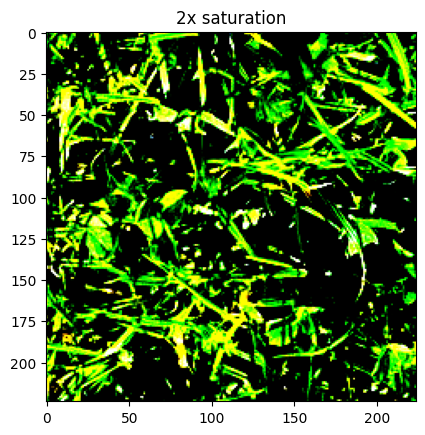

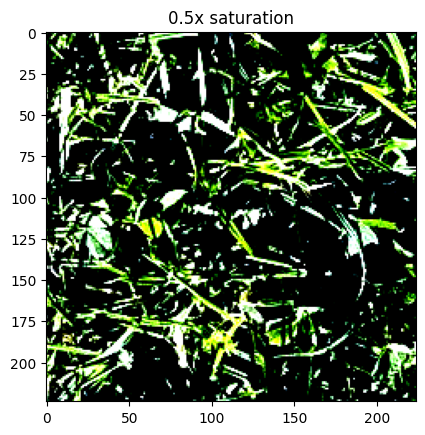

In [11]:
# saturation

# use this in actual model
# saturation_transform = v2.Compose([
#     v2.Resize((224, 224)),
#     v2.ColorJitter(saturation=(0.5, 2)),
#     v2.ToImage(),
#     v2.ToDtype(torch.float32, scale=True),
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])


max_sat_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ColorJitter(saturation=(1.9, 2.0)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

low_sat_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ColorJitter(saturation=(0.5, 0.55)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

max_sat_transform_img_tensor = max_sat_transform(raw_image)
low_sat_transform_img_tensor = low_sat_transform(raw_image)

plot_transformed_image(max_sat_transform_img_tensor, title='2x saturation')
plot_transformed_image(low_sat_transform_img_tensor, title='0.5x saturation')